# Seoul Bike Rental Prediction

# Import libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_validate
from sklearn.model_selection import RandomizedSearchCV

# Import the dataset 

In [2]:
df = pd.read_csv('../input/seoul-bike-rental-ai-pro-iti/train.csv',index_col="ID")

### This dataframe presents the Bikes Rented in this city of Seoul. It is presented as a time series which presents the data with a step of an hour.
For each hour, the dataframe mainly presents weather conditions and information about the day.

In [3]:
df.head()

,Date,y,Hour,Temperature(�C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(�C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
ID,,,,,,,,,,,,,,
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


#  
# Step 1 : Exploratory Data Analysis and Preprocessing

In [4]:
print(f'The DataFrame contains {df.shape[0]} lines and {df.shape[1]} columns')

The DataFrame contains 5760 lines and 14 columns


### Variables Presentation
Here are all the columns of the DataSet :
<li>Date : The day of the day, during 365 days, type : str                  
<li>y : Number of rented bikes per hour which is the target, type : int
<li>Hour: The hour of the day, type : int
<li>Temperature(°C): Temperature per hour, type : Float
<li>Humidity(%): Humidity in the air in %, type : int            
<li>Wind speed (m/s) : Speed of the wind in m/s, type : Float
<li>Visibility (10m): Visibility in m, type : int
<li>Dew point temperature(°C): Temperature at the beggining of the day, type : Float
<li>Solar Radiation (MJ/m2): Sun contribution, type : Float
<li>Rainfall(mm): Amount of rain in mm, type : Float
<li>Snowfall (cm): Amount of snow in cm, type : Float
<li>Seasons: Season of the year, type : str
<li>Holiday: If it is holiday period, type: str
<li>Functioning Day: If it is a Functioning Day, type : str

### We mainly will have numeric values, datetime and str

In [5]:
df.dtypes

Date                          object
y                              int64
Hour                           int64
Temperature(�C)              float64
Humidity(%)                    int64
Wind speed (m/s)             float64
Visibility (10m)               int64
Dew point temperature(�C)    float64
Solar Radiation (MJ/m2)      float64
Rainfall(mm)                 float64
Snowfall (cm)                float64
Seasons                       object
Holiday                       object
Functioning Day               object
dtype: object


### Here is the statitical description of the features

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
y,5760.0,703.483854,655.249491,0.0,188.00,485.50,1066.000,3556.00
Hour,5760.0,11.500000,6.922788,0.0,5.75,11.50,17.250,23.00
Temperature(�C),5760.0,12.803559,11.902206,-15.1,3.20,13.70,22.225,39.40
Humidity(%),5760.0,58.361806,19.840167,0.0,43.00,57.00,73.000,98.00
Wind speed (m/s),5760.0,1.723333,1.047898,0.0,0.90,1.50,2.300,7.40
Visibility (10m),5760.0,1473.711458,585.879880,27.0,1025.75,1732.00,2000.000,2000.00
Dew point temperature(�C),5760.0,4.058264,13.003582,-26.9,-5.40,5.20,14.700,27.20
Solar Radiation (MJ/m2),5760.0,0.572325,0.869943,0.0,0.00,0.01,0.940,3.52
Rainfall(mm),5760.0,0.135122,1.075320,0.0,0.00,0.00,0.000,35.00
Snowfall (cm),5760.0,0.046302,0.323728,0.0,0.00,0.00,0.000,5.10


### Now Renaming some columns

##  
### Here are the correlations between variables

#### We can see that on the target variable line the most correlated variables to the rent are :
<ul>
<li>the temperature
<li>the dew point temperature
<li>the solar radiation
</ul>

##### (The dew point is a temperature which is so cold that the vapor becomes liquid)

Text(0.5, 1.0, 'features_correlation')

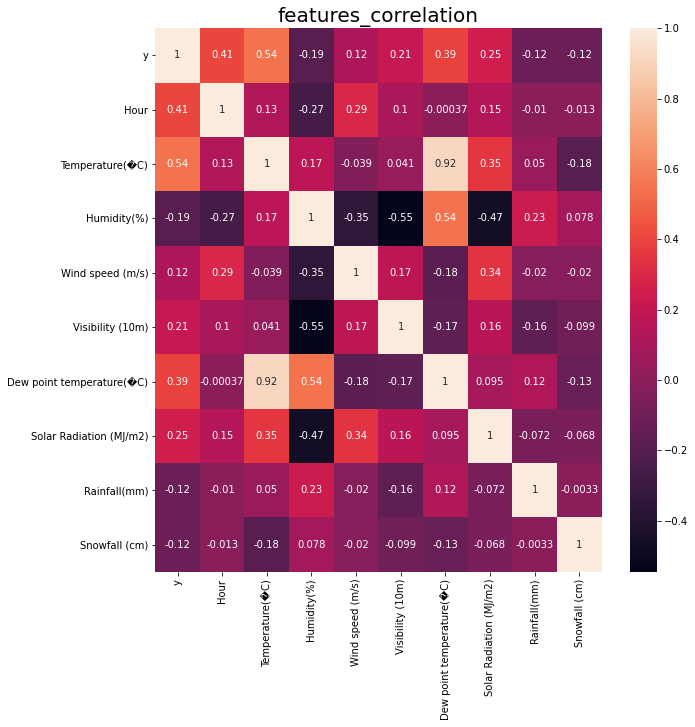

In [7]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True)
plt.title("features_correlation",size=20)


In [8]:
#sns.pairplot(df)
#plt.show()

### We see that there is a hyper correlation between columns 'Temperature(°C)' and 'Dew point temperature(°C)'  so we can drop the column 'Dew point temperature(°C)' as they have the same variations.

In [9]:
df.head()

,Date,y,Hour,Temperature(�C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(�C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
ID,,,,,,,,,,,,,,
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


#### This is the list of sorted correlation of variables to the target

In [10]:
pd.DataFrame(df.corr().unstack().sort_values(ascending=False)['y'],columns=['Correlation to the target'])

,Correlation to the target
y,1.000000
Temperature(�C),0.544281
Hour,0.407180
Dew point temperature(�C),0.392454
Solar Radiation (MJ/m2),0.250601
Visibility (10m),0.214777
Wind speed (m/s),0.116380
Rainfall(mm),-0.117711
Snowfall (cm),-0.120836
Humidity(%),-0.191603


#  
# Step 2 : Data Preparation and data Visualisation

### Creating variables

###### We create a column feature which gives the day of the week and the month corresponding to the date

In [11]:
df_train_target = df['y']
df = df.drop('y',axis=1)

In [12]:
df.dtypes

Date                          object
Hour                           int64
Temperature(�C)              float64
Humidity(%)                    int64
Wind speed (m/s)             float64
Visibility (10m)               int64
Dew point temperature(�C)    float64
Solar Radiation (MJ/m2)      float64
Rainfall(mm)                 float64
Snowfall (cm)                float64
Seasons                       object
Holiday                       object
Functioning Day               object
dtype: object

In [13]:
def preprocess(df):
    df = df.rename({'Temperature(�C)':'Temperature(°C)',
                'Dew point temperature(�C)':'Dew point temperature(°C)'}, axis=1)
    df = df.drop(['Dew point temperature(°C)'],axis=1)

    numerical_cols = [cname for cname in df.columns if df[cname].dtype in ['int64', 'float64'] and cname not in ['Rainfall(mm)','Snowfall (cm)','Hour'] ]
    categorical_cols = [cname for cname in df.columns if df[cname].dtype == "object" or cname in ['Rainfall(mm)','Snowfall (cm)','Hour']]
    df_numerical = df[numerical_cols]
    df_categorical = df[categorical_cols]

    df_categorical['Date'] = pd.to_datetime(df_categorical['Date'],infer_datetime_format=True)
    df_categorical['Month'] = df_categorical['Date'].dt.month
    df_categorical['Week Day'] = df_categorical['Date'].dt.day_name()
    df_categorical= pd.get_dummies(df_categorical, columns=['Week Day','Month','Functioning Day','Holiday','Seasons','Hour'])

    df_categorical['Rain'] = df_categorical['Rainfall(mm)'].map(lambda x: 0 if x == 0.0 else 1)
    df_categorical['Snow'] = df_categorical['Snowfall (cm)'].map(lambda x: 0 if x == 0.0 else 1)
    df_categorical.drop(['Date','Rainfall(mm)','Snowfall (cm)'],axis=1,inplace=True)
    return df_categorical,df_numerical

In [14]:
def preprocess2(df):
    df = df.rename({'Temperature(�C)':'Temperature(°C)',
                'Dew point temperature(�C)':'Dew point temperature(°C)'}, axis=1)
    df = df.drop(['Dew point temperature(°C)'],axis=1)

    numerical_cols = [cname for cname in df.columns if df[cname].dtype in ['int64', 'float64'] and cname not in ['Hour'] ]
    categorical_cols = [cname for cname in df.columns if df[cname].dtype == "object" or cname in ['Hour']]
    df_numerical = df[numerical_cols]
    df_categorical = df[categorical_cols]

    df_categorical['Date'] = pd.to_datetime(df_categorical['Date'],infer_datetime_format=True)
    df_categorical['Month'] = df_categorical['Date'].dt.month
    df_categorical['Week Day'] = df_categorical['Date'].dt.day_name()
    df_categorical= pd.get_dummies(df_categorical, columns=['Week Day','Month','Functioning Day','Holiday','Seasons','Hour'])


    df_categorical.drop(['Date'],axis=1,inplace=True)
    return df_categorical,df_numerical

In [15]:
df_train_cat,df_train_num = preprocess(df)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

In [16]:
scaler = StandardScaler()
df_numerical = scaler.fit_transform(df_train_num)
df_train_num = pd.DataFrame(df_numerical,columns=df_train_num.columns)
df_train_num.index = df.index

In [17]:
df_train = pd.concat([df_train_num,df_train_cat],axis=1)

In [18]:
df_train.head()

,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Solar Radiation (MJ/m2),Week Day_Friday,Week Day_Monday,Week Day_Saturday,Week Day_Sunday,Week Day_Thursday,...,Hour_16,Hour_17,Hour_18,Hour_19,Hour_20,Hour_21,Hour_22,Hour_23,Rain,Snow
ID,,,,,,,,,,,,,,,,,,,,,
0,-1.512755,-1.076788,0.454918,0.898365,-0.657945,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,-1.537963,-1.026381,-0.881205,0.898365,-0.657945,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,-1.579975,-0.975974,-0.690331,0.898365,-0.657945,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,-1.596780,-0.925567,-0.785768,0.898365,-0.657945,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,-1.579975,-1.127195,0.550356,0.898365,-0.657945,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [19]:
X_train = df_train
y_train = df_train_target

In [20]:
X_train.columns

Index(['Temperature(°C)', 'Humidity(%)', 'Wind speed (m/s)',
       'Visibility (10m)', 'Solar Radiation (MJ/m2)', 'Week Day_Friday',
       'Week Day_Monday', 'Week Day_Saturday', 'Week Day_Sunday',
       'Week Day_Thursday', 'Week Day_Tuesday', 'Week Day_Wednesday',
       'Month_1', 'Month_2', 'Month_3', 'Month_4', 'Month_5', 'Month_6',
       'Month_7', 'Month_8', 'Month_9', 'Month_10', 'Month_11', 'Month_12',
       'Functioning Day_No', 'Functioning Day_Yes', 'Holiday_Holiday',
       'Holiday_No Holiday', 'Seasons_Autumn', 'Seasons_Spring',
       'Seasons_Summer', 'Seasons_Winter', 'Hour_0', 'Hour_1', 'Hour_2',
       'Hour_3', 'Hour_4', 'Hour_5', 'Hour_6', 'Hour_7', 'Hour_8', 'Hour_9',
       'Hour_10', 'Hour_11', 'Hour_12', 'Hour_13', 'Hour_14', 'Hour_15',
       'Hour_16', 'Hour_17', 'Hour_18', 'Hour_19', 'Hour_20', 'Hour_21',
       'Hour_22', 'Hour_23', 'Rain', 'Snow'],
      dtype='object')

In [21]:
dropped_columns = ['Holiday_Holiday', 'Seasons_Autumn', 'Seasons_Spring','Functioning Day_No']
X_train = X_train.drop(dropped_columns,axis=1)

In [22]:
etr_model = ExtraTreesRegressor(n_jobs=-1,random_state=0,n_estimators=100,max_depth=70,min_samples_split=5,min_samples_leaf=3)
cross_validation = cross_validate(etr_model,
                                  X_train,
                                  y_train,
                                  n_jobs=-1,
                                  cv=5,
                                  scoring='neg_mean_squared_log_error')

In [23]:
-1 * cross_validation['test_score']

array([0.28106833, 0.85899504, 0.39819926, 0.22713618, 5.52934509])

In [24]:
etr_model.fit(X_train,y_train)
y_pred = etr_model.predict(X_train)


# Test Data

In [25]:
df_test = pd.read_csv('../input/seoul-bike-rental-ai-pro-iti/test.csv',index_col="ID")

In [26]:
df_test_cat,df_test_num = preprocess(df_test)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

In [27]:
df_numerical = scaler.transform(df_test_num)
df_test_num = pd.DataFrame(df_numerical,columns=df_test_num.columns)
df_test_num.index = df_test.index

In [28]:
X_test = pd.concat([df_test_num,df_test_cat],axis=1)

In [29]:
X_test = X_test.drop(dropped_columns,axis=1)

In [30]:
X_test.columns

Index(['Temperature(°C)', 'Humidity(%)', 'Wind speed (m/s)',
       'Visibility (10m)', 'Solar Radiation (MJ/m2)', 'Week Day_Friday',
       'Week Day_Monday', 'Week Day_Saturday', 'Week Day_Sunday',
       'Week Day_Thursday', 'Week Day_Tuesday', 'Week Day_Wednesday',
       'Month_1', 'Month_2', 'Month_3', 'Month_4', 'Month_5', 'Month_6',
       'Month_7', 'Month_8', 'Month_9', 'Month_10', 'Month_11', 'Month_12',
       'Functioning Day_Yes', 'Holiday_No Holiday', 'Seasons_Summer',
       'Seasons_Winter', 'Hour_0', 'Hour_1', 'Hour_2', 'Hour_3', 'Hour_4',
       'Hour_5', 'Hour_6', 'Hour_7', 'Hour_8', 'Hour_9', 'Hour_10', 'Hour_11',
       'Hour_12', 'Hour_13', 'Hour_14', 'Hour_15', 'Hour_16', 'Hour_17',
       'Hour_18', 'Hour_19', 'Hour_20', 'Hour_21', 'Hour_22', 'Hour_23',
       'Rain', 'Snow'],
      dtype='object')

In [31]:
y_pred = etr_model.predict(X_test)
X_test['ID'] = X_test.index
X_test['y'] = y_pred
X_test.loc[X_test['Functioning Day_Yes']==0,'y']=0
df_submit = X_test[['ID','y']]
df_submit.to_csv('submission.csv', index=False)